# Tokenization

In [16]:
import nltk

In [17]:
# 예시 문장 정의
sentence = 'One of the essential things in the life of a human being is communication. We need to communicate with other human beings to deliver information, express our emotions, present ideas, and much more. The key to communication is language.'

# 문장별로 분리
tokenized_sentence = nltk.sent_tokenize(sentence)

# 각 문장 출력
for i, item in enumerate(tokenized_sentence):
    print("Token {0}:".format(i), item)

Token 0: One of the essential things in the life of a human being is communication.
Token 1: We need to communicate with other human beings to deliver information, express our emotions, present ideas, and much more.
Token 2: The key to communication is language.


In [18]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 예시 문장 정의
sentence = "Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."

# 다양한 토큰화 방식을 적용한 후 결과 비교
sentence_word_tokenize = nltk.word_tokenize(sentence)
sentence_WordPunctTokenizer = nltk.WordPunctTokenizer().tokenize(sentence)
sentence_text_to_word_sequence = text_to_word_sequence(sentence)

for tokens in [sentence_word_tokenize, sentence_WordPunctTokenizer, sentence_text_to_word_sequence]:
    print("="*60, end="\n\n")
    print(tokens)



['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


# Preprocessing

## Stopword

In [19]:
from nltk.corpus import stopwords

# nltk에 정의된 불용어 개수 및 예시 출력
stop_words_list = stopwords.words('english')
print('The number of stopwords :', len(stop_words_list))
print('Example of stopwords :',stop_words_list[:10])

The number of stopwords : 179
Example of stopwords : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


## Lemmatization

In [20]:
# 표제어 추출알고리즘
lemmatizer = nltk.stem.WordNetLemmatizer()

# be동사의 활용을 잘 식별함
words = ['be', 'is', 'am', 'are', 'was', 'were', 'been']
result = [lemmatizer.lemmatize(w, 'v') for w in words] # 각 리스트 요소별로 표제어 추출 / 'v'는 표제어 추출 대상 단어가 동사임을 나타냄

print(result)

['be', 'be', 'be', 'be', 'be', 'be', 'be']


In [21]:
# 비슷한 단어를 잘 구별함
words = ['print', 'printing', 'printer', 'printed', 'sprint', 'sprinter', 'sprinting', 'sprinted']
result = [lemmatizer.lemmatize(w, 'v') for w in words]

print(result)

['print', 'print', 'printer', 'print', 'sprint', 'sprinter', 'sprint', 'sprint']


In [22]:
# 일반동사는 잘 식별하지 못할 수 있음
words = ['study', 'studies', 'studied', 'code', 'codes', 'coding', 'coded']
result = [lemmatizer.lemmatize(w, 'v') for w in words]

print(result)

['study', 'study', 'study', 'code', 'cod', 'cod', 'cod']


## Embedding

### Sparse Representation

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# 예시 Corpus 정의
corpus = [
 'This is the first document.',
 'This is the second second document.',
 'And the third one.',
 'Is this the first document?',
 'The last document?',
]

# 정의된 불용어 집합 할당 후
# 임베딩 함수의 인자로 전달하여 불용어 제거
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words = stop_words)

vectorizer.fit(corpus) # 목적 Corpus에 맞게 함수 fit
vectorized_corpus = vectorizer.transform(corpus) # 목적 Corpus를 Sparse Vector 형태로 변환하여 결과 할당
print(vectorizer.vocabulary_) # Fit된 함수의 사전 출력

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}


In [24]:
# 각 단어(==인덱스)별로 어떻게 정의 되었는지 확인
print(vectorized_corpus.toarray())

[[1 1 0 0 0 0]
 [1 0 0 0 2 0]
 [0 0 0 1 0 1]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]]


### Word2Vec -- Skip-gram

In [25]:
# 피터팬 내용이 적혀있는 txt파일을 불러오기
peterpan_file = open('./data/peterpan.txt', 'r')
PeterPan = []
while True:
    line = peterpan_file.readline()
    if not line:
        break
    else:
        line = str(line).split('.')
        for item in line:
            if item == '\n':
                continue
            if item[0] == ' ':
                item = item[1:]
            item = item + '.'
            PeterPan.append(item)

In [26]:
# 개행 제거됨
PeterPan_words = []
for item in PeterPan:
    tokens = nltk.word_tokenize(item)
    PeterPan_words.append(tokens)
for item in PeterPan_words:
    for i, word in enumerate(item):
        word = word.lower()
        item[i] = word
for item in PeterPan_words:
    print(item)


['once', 'upon', 'a', 'time', 'in', 'london', ',', 'the', 'darlings', 'went', 'out', 'to', 'a', 'dinner', 'party', 'leaving', 'their', 'three', 'children', 'wendy', ',', 'jhon', ',', 'and', 'michael', 'at', 'home', '.']
['after', 'wendy', 'had', 'tucked', 'her', 'younger', 'brothers', 'jhon', 'and', 'michael', 'to', 'bed', ',', 'she', 'went', 'to', 'read', 'a', 'book', '.']
['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.']
['he', 'was', 'flying', '.']
['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.']
['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.']
['“', 'hello', '!', 'who', 'are', 'you', '?', 'why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.']
['“', 'my', 'name', 'is', 'peter', 'pan', '.']
['my', 'shadow', 'wouldn', '’', 't', 'stock', 'to', 'me', '.']
['”', ',', 'he', 'replied', '.']
['she', 'asked', 'him', 'to', 'come', 'in', '.']
['peter', 'agreed', 'and', 'came', 'inside', 'the', 'room', '.']
['wend

In [12]:
from gensim.models import Word2Vec

skipgram = Word2Vec(sentences = PeterPan_words, vector_size = 100, window = 5, min_count = 1,
                    workers = -1, sg = 1, epochs = 10000)
# sentence: Word2Vec 대상이 될 Corpus
# Vector_size: Embedding Vector의 차원
# window: 학습 시 참고할 예측 단어 수
# min_count: 단어 사전에 등록하기 위한 특정 단어의 최소 등장 횟수
# worker: 학습 시 사용할 cpu processor 수
# sg: 0 -> CBOW / 1 -> Skip-Gram

In [13]:
print(skipgram.wv.similarity('peter', 'wendy'))
print(skipgram.wv.similarity('peter', 'hook'))

0.16694683
-0.10914916


In [14]:
sims = skipgram.wv.most_similar('wendy', topn=10)
for vocab in sims:
    print(vocab)

('go', 0.3144782483577728)
('as', 0.31288501620292664)
('welcomed', 0.24795961380004883)
('cook', 0.22837774455547333)
('lily', 0.2154766470193863)
('parents', 0.19425667822360992)
('through', 0.18690802156925201)
('each', 0.1867627203464508)
('agreed', 0.18594345450401306)
('soon', 0.1822592169046402)


# RNN

In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Package for loading data
import pandas_datareader.data as web

## Load Data

In [2]:
# 불러온 모듈의 DataReader 함수 call
# 주식 티커 삼성전자 - 005930 / sk 하이닉스 - 000660 / 애플 - AAPL 등등
# 데이터를 불러올 소스(허브?) 지정 -> naver, yahoo, eurostat...
# start&end: 불러올 주가의 날짜 범위 지정
raw_stock = web.DataReader('005930', 'naver', start = '2000-01-01', end = '2023-06-30')

In [3]:
# 주가 데이터의 경우 특히 OHLCV 데이터라고 부름
raw_stock

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000,6110,5660,6110,1483967
2000-01-05,5800,6060,5520,5580,1493604
2000-01-06,5750,5780,5580,5620,1087810
2000-01-07,5560,5670,5360,5540,806195
2000-01-10,5600,5770,5580,5770,937615
...,...,...,...,...,...
2023-06-26,71700,72500,71500,72400,10541901
2023-06-27,72500,72600,72000,72600,9442997
2023-06-28,72600,72700,72000,72700,8783093


In [4]:
# 모든 열이 object형임을 확인 -> 실수형으로 변환
raw_stock.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [5]:
# 모든열의 데이터 타입을 실수형을 변환
raw_stock = raw_stock.astype('float')
raw_stock.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

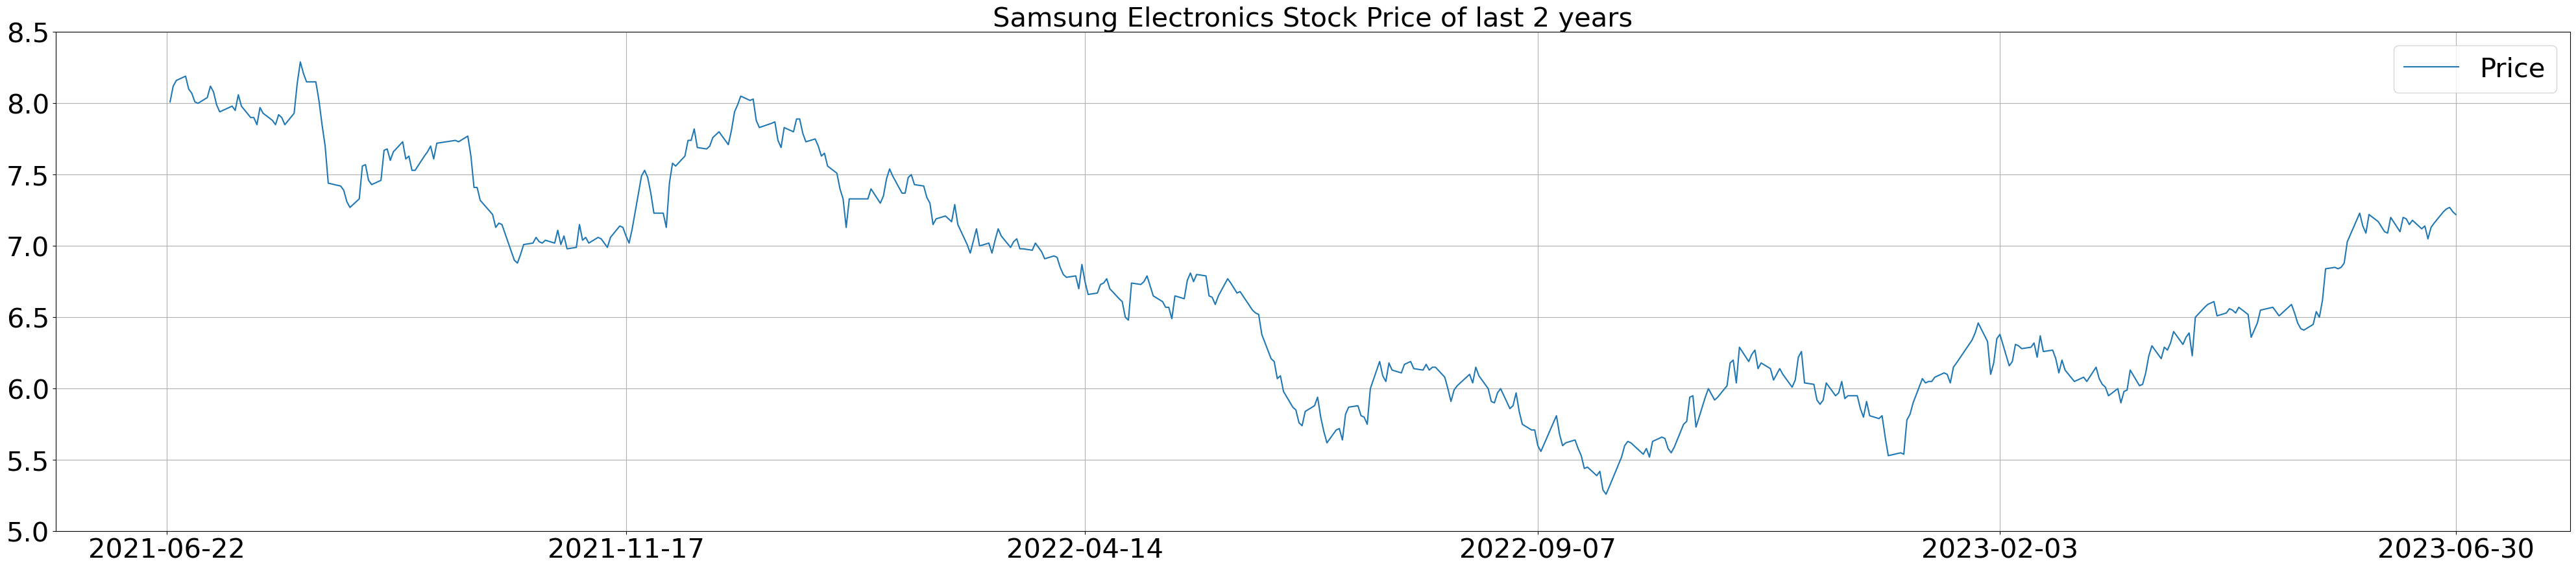

In [6]:
# 최근 2년 주가 데이터 시각화
fig, ax = plt.subplots(figsize = (50, 10))

ax.plot(raw_stock['Close'][-500:] / 10000 , label = 'Price')

xticks = [str(t)[:-9] for t in raw_stock.index[-501::100]]
yticks = ax.get_yticks()

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, fontsize = 30)
ax.set_yticklabels(yticks, fontsize = 30)

ax.set_title("Samsung Electronics Stock Price of last 2 years",
             fontsize = 30)

ax.grid()
ax.legend(fontsize = 30)

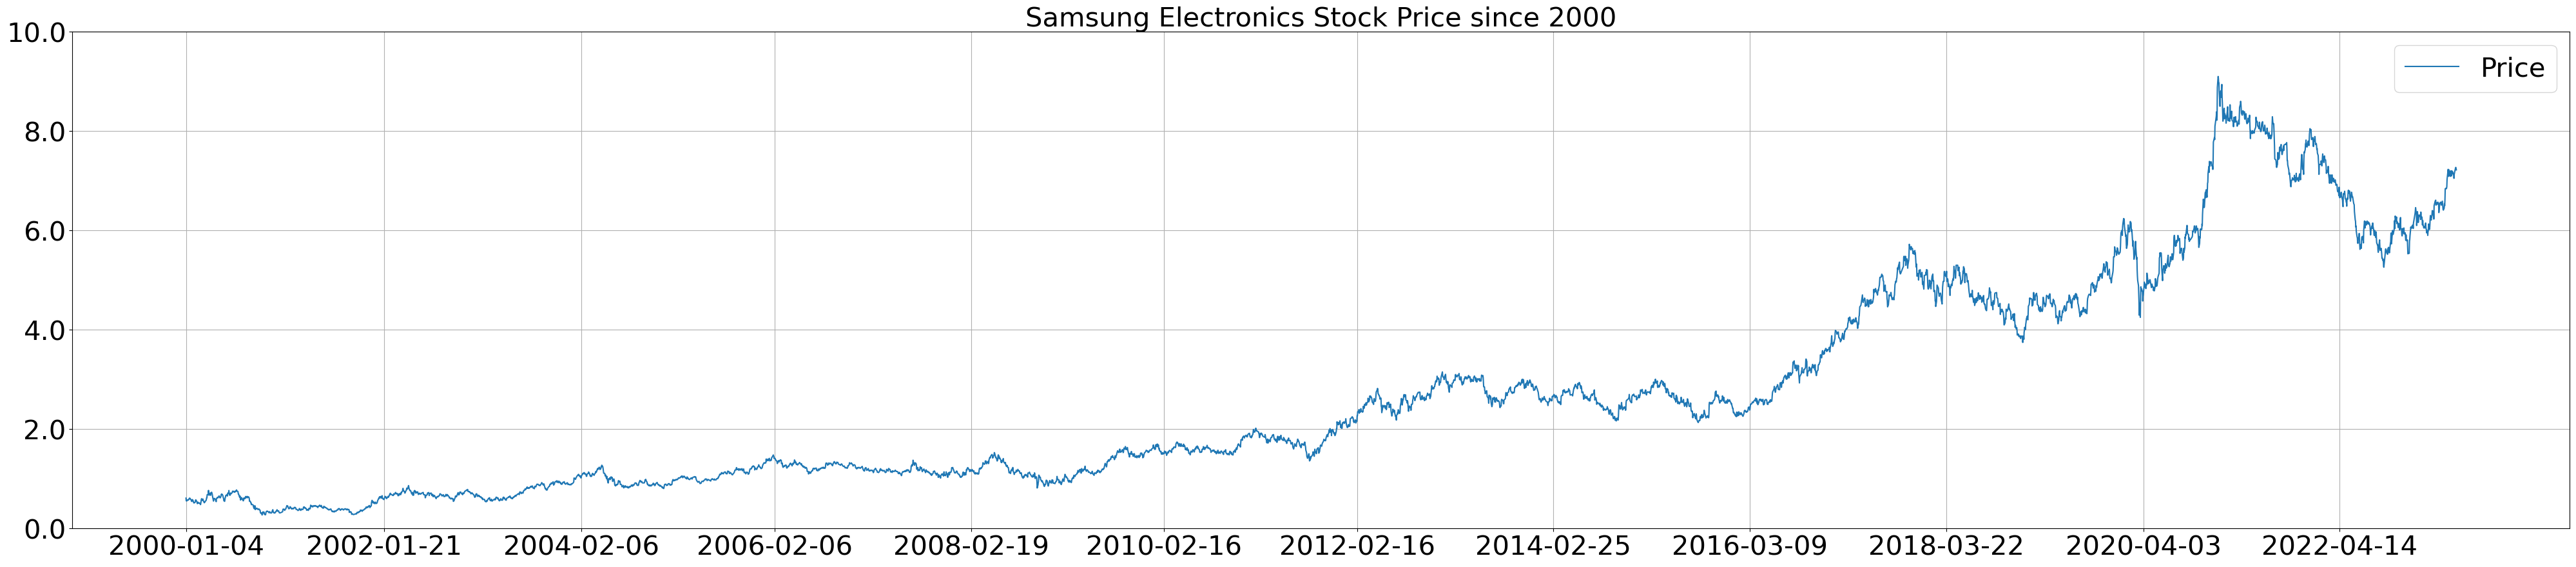

In [7]:
# 주가 데이터 시각화
fig, ax = plt.subplots(figsize = (50, 10))

ax.plot(raw_stock['Close'] / 10000 , label = 'Price')

ax.set_ylim([0, 10])

xticks = [str(t)[:-9] for t in raw_stock.index[::500]]
yticks = ax.get_yticks()

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, fontsize = 30)
ax.set_yticklabels(yticks, fontsize = 30)

ax.set_title("Samsung Electronics Stock Price since 2000",
             fontsize = 30)

ax.grid()
ax.legend(fontsize = 30)

## Data Preprocessing

In [8]:
# pd.Series 데이터를 입력 받아
# window_size단위로 자르고 
# 바로 다음 시점의 데이터를 y값으로 만드는 함수 정의
def window_seq(data: pd.Series, window_size: int):
    data_X = []
    data_y = []

    for i in range(len(raw_stock) - window_size):
        _X = data[i : i + window_size].to_list() # 모델의 인풋이될 데이터들, window_size만큼 들어감
        _y = data[i + window_size]               # 모델의 예측 대상 데이터
        data_X.append(_X)
        data_y.append(_y)

    data_X = np.array(data_X)
    data_y = np.array(data_y)

    return data_X, data_y

In [9]:
# window_size를 20으로 지정하여 데이터 조정
# 종가만 사용하는 것으로 합시다.
window_size = 20
X, Y = window_seq(raw_stock['Close'], window_size)

In [10]:
# 데이터 조작 후 차원 정보 확인
# window_size만큼 데이터 수가 줄어든 것을 확인
print("Shape of Raw Data:", raw_stock.shape)
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of Raw Data: (5801, 5)
Shape of X: (5781, 20)
Shape of Y: (5781,)


In [11]:
from sklearn.model_selection import train_test_split

# train/test 데이터 셋으로 분리
# 데이터를 섞지 않고 과거 시점의 데이터를 보고 미래 시점을 테스트 데이터 셋으로 취급함
# 시계열 모형의 목적은 미래 시점을 예측하는 것
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, shuffle = False) 

In [12]:
# 데이터 조작 후 차원 정보 확인
# window_size만큼 데이터 수가 줄어든 것을 확인
print("Shape of Raw Data:", raw_stock.shape)
print("Shape of train_X:", train_X.shape)
print("Shape of train_Y:", train_Y.shape)
print("Shape of test_X:", test_X.shape)
print("Shape of test_Y:", test_Y.shape)

Shape of Raw Data: (5801, 5)
Shape of train_X: (4624, 20)
Shape of train_Y: (4624,)
Shape of test_X: (1157, 20)
Shape of test_Y: (1157,)


In [13]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# 이미 X, Y를 분리했으므로 따로 스케일링 진행
# train 데이터에 fit해야함, test데이터로 fit할 경우 target leakage 이슈 발생
mms_X = MinMaxScaler()
mms_X.fit(train_X)
train_X = mms_X.transform(train_X)
test_X = mms_X.transform(test_X)

mms_Y = MinMaxScaler()
train_Y = np.array(train_Y).reshape(-1, 1) # 원래 Y는 (-1,)차원, sklearn의 scaler들은 2차원 이상의 인풋을 기대함
test_Y = np.array(test_Y).reshape(-1, 1) # 차원을 맞춰줘야 에러가 발생하지 않음
mms_Y.fit(train_Y)
train_Y = mms_Y.transform(train_Y)
test_Y = mms_Y.transform(test_Y)

## Train

In [14]:
import torch
import torch.nn as nn
from torch import optim
from torch.optim.lr_scheduler import ReduceLROnPlateau 
from torchsummary import summary

from utils import train_val, seed_everything

In [15]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'
print(DEVICE)

cpu


In [17]:
import numpy as np
import torch
from torch.utils.data import Dataset

class stock_Dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.from_numpy(X).float()
        self.Y = torch.from_numpy(Y).float()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [18]:
from torch.utils.data import DataLoader

seed = 3132
seed_everything(seed)

train_dataset = stock_Dataset(train_X, train_Y)
test_dataset = stock_Dataset(test_X, test_Y)

# create DataLoader
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True) # (train_X, train_Y) 5781
val_dl = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [19]:
# 추후 전체 데이터에 대해 예측을 진행하기 위해 전체 데이터 셋으로도 Dataloader 정의
total_X = mms_X.transform(X)

total_Y = np.array(Y).reshape(-1, 1)
total_Y = mms_Y.transform(total_Y)

total_dataset = stock_Dataset(total_X, total_Y)

total_dl = DataLoader(total_dataset, batch_size = 32, shuffle = False)

### RNN

In [22]:
class RNN(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size = 1):
    super(RNN, self).__init__()
    #RNN layer
    self.rnn_layer = nn.RNN(input_size = input_size, hidden_size = hidden_size,
                            num_layers = 1, batch_first = True)
    #linear layer
    self.linear = nn.Linear(hidden_size, output_size) # 회귀문제이므로 출력층에 별도에 activation function 불필요

  def forward(self, x):
    # torch.Tensor.view(dim)은 numpy의 reshape와 같은 기능
    x = x.view(x.size(0), x.size(1), -1)
    # size of the data: (batch_size, length of the sequence, input_size) ->
    # o: (batch_size, length of the sequence, hidden_size)
    # hidden: (num_layer, batch_size, hidden_size)
    o, hidden = self.rnn_layer(x)
    y = self.linear(o[:, -1, :]) # 마지막 시점의 출력만 사용

    return y.view(-1, 1) 

In [23]:
seed = 3132
seed_everything(seed)
rnn = RNN(input_size = 1, hidden_size = 8, output_size = 1).to(DEVICE)

loss_func = nn.MSELoss(reduction = 'sum') # util모듈 내부 로직으로 RMSE Loss 구현
opt = optim.Adam(rnn.parameters(), lr = 0.001) # Adam에 모델의 학습 파라미터를 넣어줌

lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor = 0.1, patience = 50)

In [24]:
# definc the training parameters
RNN_params_train = {
    'num_epochs': 500,
    'optimizer': opt,
    'loss_func': loss_func,
    'train_dl': train_dl,
    'val_dl': val_dl,
    'sanity_check': False, # True인 경우 데이터 조금만(batch 1개) 사용해서 학습 코드가 잘 돌아가는지 확인 / False면 데이터 전체 사용
    'lr_scheduler': lr_scheduler,
    'path2weights': './model/rnn.pt', # 모델 파라미터를 저장할 경로
    'task': 'regression', # 분류 / 회귀 문제인지 정의 -> Metric -- 분류: Accuracy / 회귀: MSE
    'DEVICE': DEVICE, # cpu / cuda
    'early_stopping': True, # 학습 조기 종료 적용 여부 -> True: 적용 / False: 미적용
    'patience_limit': 50
}

In [ ]:
rnn, loss_hist, metric_hist, best_epoch = train_val(rnn, RNN_params_train)
# 데스크탑 사용했습니다.
# EARLY STOPPED AT EPOCH: 137
# bext_epoch: 87

In [25]:
rnn.load_state_dict(torch.load('./model/rnn.pt', map_location = torch.device('cpu')))

<All keys matched successfully>

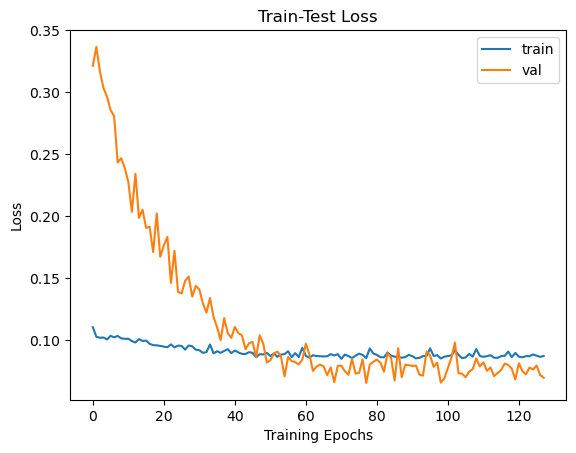

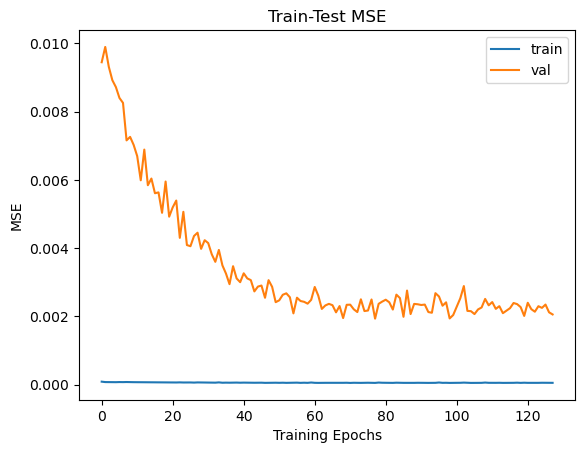

In [28]:
# load history
loss_hist = np.load('./model/rnn_loss_history.npy', allow_pickle = True).tolist()
metric_hist = np.load('./model/rnn_metric_history.npy', allow_pickle = True).tolist()

# Train-validation Progress
# num_epochs = RNN_params_train["num_epochs"]
num_epochs = 137

# plot loss progress
plt.title("Train-Test Loss")
plt.plot(loss_hist["train"][10:],label="train")
plt.plot(loss_hist["val"][10:],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Test MSE")
plt.plot(metric_hist["train"][10:],label="train")
plt.plot(metric_hist["val"][10:],label="val")
plt.ylabel("MSE")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [29]:
rnn.eval()
stock_pred = []

for xb, yb in total_dl:
    output = rnn(xb.to(DEVICE))
    output = output.detach().numpy().reshape(-1, 1)
    for item in output:
        stock_pred.append(item)
# stock_pred = stock_pred.detach().numpy().reshape(-1, 1)
stock_pred = mms_Y.inverse_transform(stock_pred)

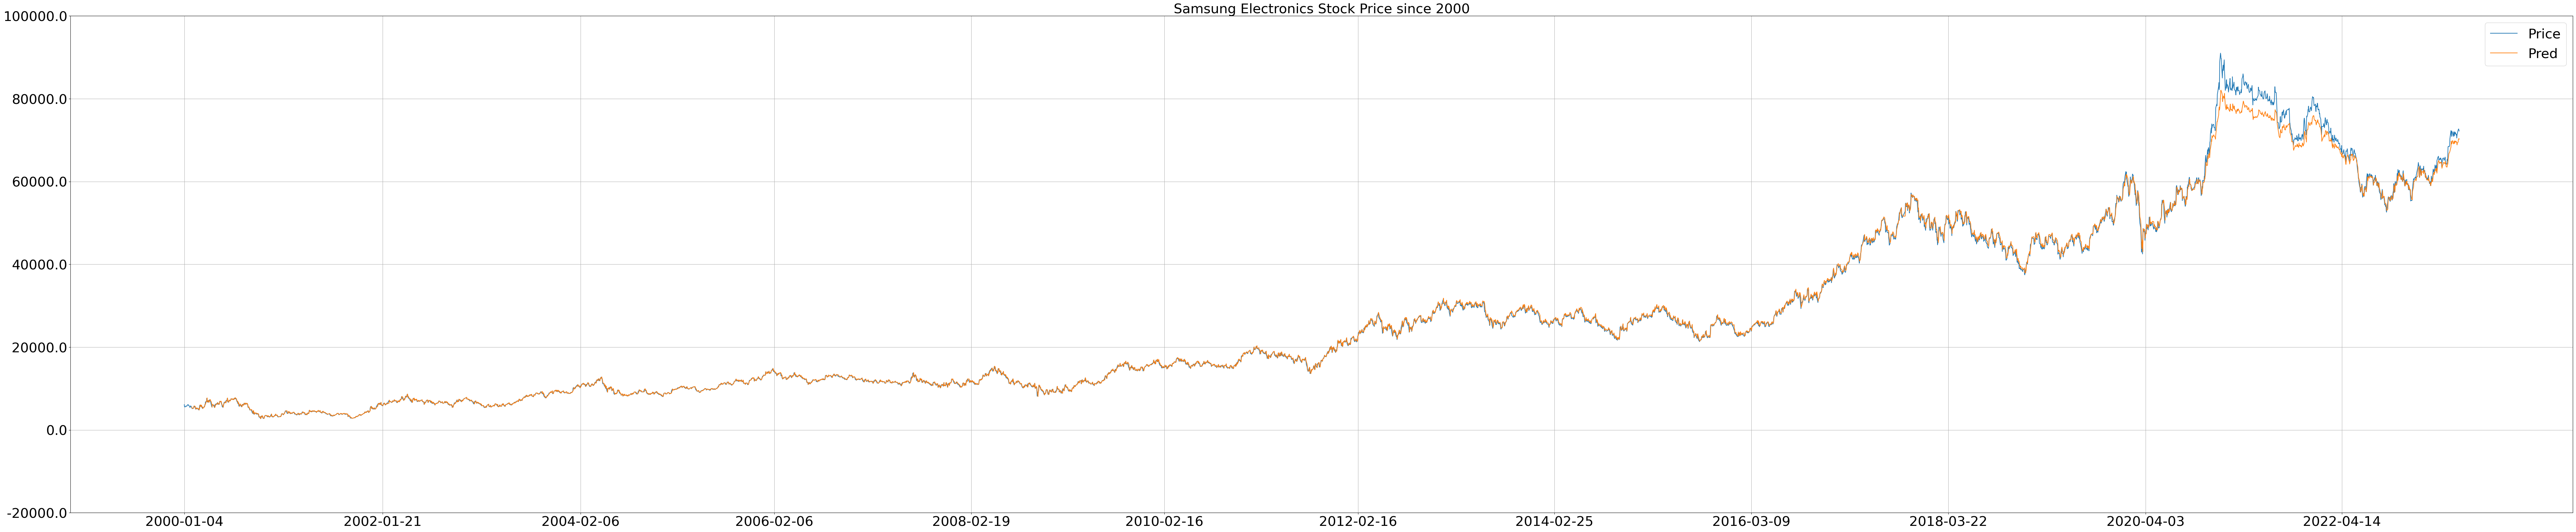

In [33]:
data_idx = raw_stock.index

# 주가 데이터 시각화
fig, ax = plt.subplots(figsize = (100, 20))

ax.plot(data_idx, raw_stock['Close'], label = 'Price')
ax.plot(data_idx[20:], stock_pred, label = "Pred")

# ax.set_ylim([0, 10])

xticks = ax.get_xticks()
xticks = [str(t)[:-9] for t in raw_stock.index[::500]]
yticks = ax.get_yticks()

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, fontsize = 30)
ax.set_yticklabels(yticks, fontsize = 30)

ax.set_title("Samsung Electronics Stock Price since 2000",
             fontsize = 30)

ax.grid()
ax.legend(fontsize = 30)

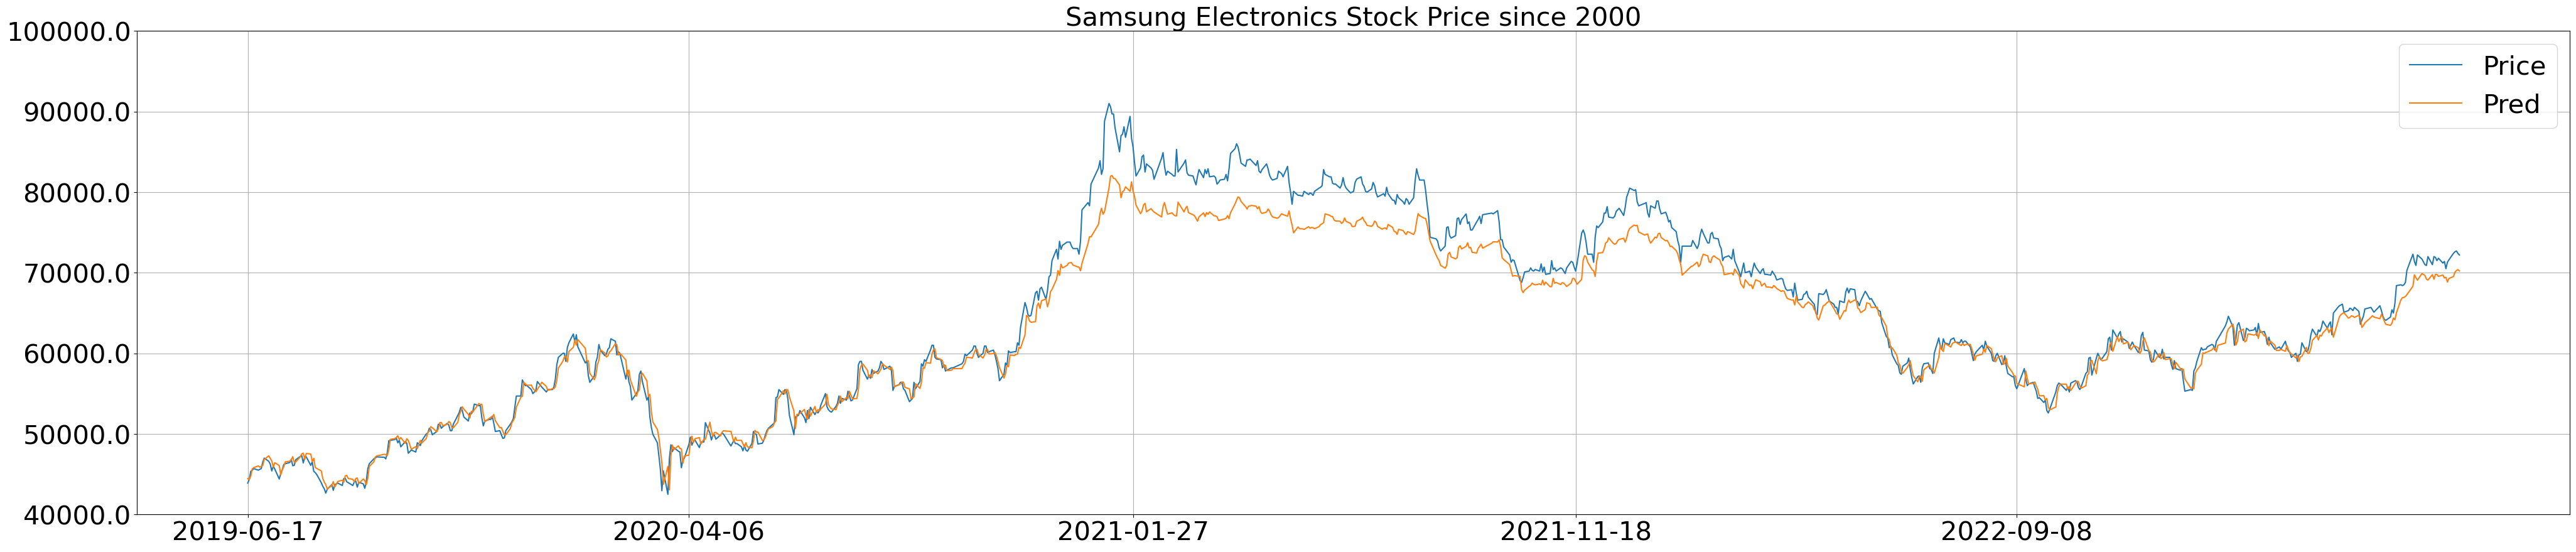

In [34]:
data_idx = raw_stock.index[-1000:]

# 주가 데이터 시각화
fig, ax = plt.subplots(figsize = (50, 10))

ax.plot(data_idx, raw_stock['Close'][-1000:], label = 'Price')
ax.plot(data_idx[-1000:], stock_pred[-1000:], label = "Pred")

# ax.set_ylim([0, 10])

xticks = ax.get_xticks()
xticks = [str(t)[:-9] for t in raw_stock.index[-1000::200]]
yticks = ax.get_yticks()

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, fontsize = 30)
ax.set_yticklabels(yticks, fontsize = 30)

ax.set_title("Samsung Electronics Stock Price since 2000",
             fontsize = 30)

ax.grid()
ax.legend(fontsize = 30)

### LSTM

In [35]:
class LSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = torch.nn.LSTM(input_size, self.hidden_size, self.num_layers, batch_first=True) # dtype = torch.float64
        self.linear1 = torch.nn.Linear(hidden_size, 4) # dtype = torch.float64
        self.linear2 = torch.nn.Linear(4, output_size) # dtype = torch.float64
    
    def forward(self, x):
        x = x.view(x.size(0), x.size(1), -1)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE) # .type(torch.float64) [1, 32, 8]
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(DEVICE) # .type(torch.float64)
        
        out, (h_n, c_n) = self.lstm(x, (h0, c0))
        out = self.linear1(out[:, -1, :])
        out = self.linear2(out)
        
        return out.view(-1, 1)

In [36]:
seed = 3132
seed_everything(seed)
lstm = LSTM(input_size = 1, hidden_size = 8, num_layers = 1, output_size = 1).to(DEVICE)

loss_func = nn.MSELoss(reduction = 'sum') # util모듈 내부 로직으로 RMSE Loss 구현
opt = optim.Adam(lstm.parameters(), lr = 0.001) # Adam에 모델의 학습 파라미터를 넣어줌

lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor = 0.1, patience = 50)

In [37]:
# definc the training parameters
LSTM_params_train = {
    'num_epochs': 500,
    'optimizer': opt,
    'loss_func': loss_func,
    'train_dl': train_dl,
    'val_dl': val_dl,
    'sanity_check': False, # True인 경우 데이터 조금만(batch 1개) 사용해서 학습 코드가 잘 돌아가는지 확인 / False면 데이터 전체 사용
    'lr_scheduler': lr_scheduler,
    'path2weights': './model/lstm.pt', # 모델 파라미터를 저장할 경로
    'task': 'regression',
    'DEVICE': DEVICE,
    'early_stopping': True,
    'patience_limit': 50
}

In [ ]:
lstm, loss_hist, metric_hist, best_epoch = train_val(lstm, LSTM_params_train)
# EARLY STOPPED AT EPOCH: 91
# best_epoch: 91

In [38]:
lstm.load_state_dict(torch.load('./model/lstm.pt', map_location = torch.device('cpu')))

<All keys matched successfully>

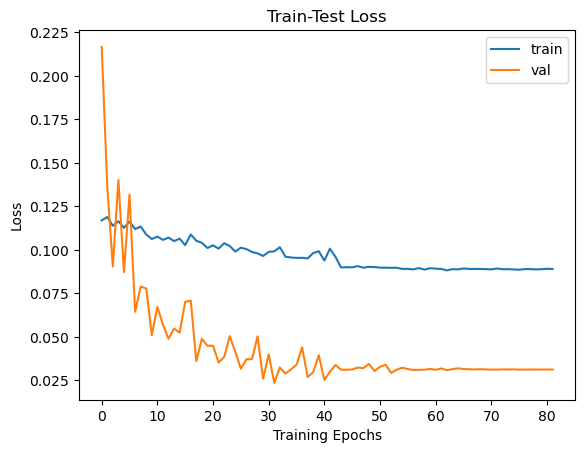

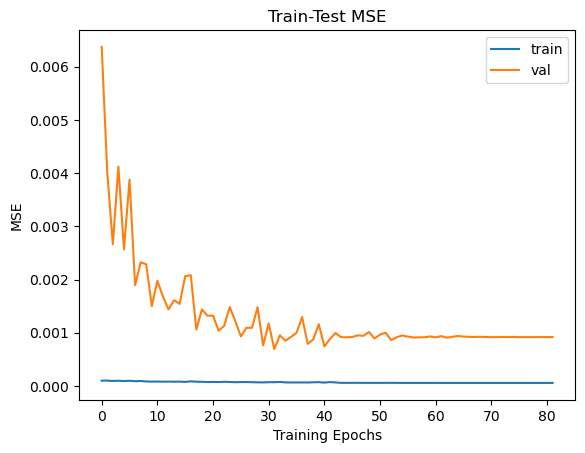

In [39]:
# load history
loss_hist = np.load('./model/lstm_loss_history.npy', allow_pickle = True).tolist()
metric_hist = np.load('./model/lstm_metric_history.npy', allow_pickle = True).tolist()

# Train-validation Progress
# num_epochs = RNN_params_train["num_epochs"]
num_epochs = 137

# plot loss progress
plt.title("Train-Test Loss")
plt.plot(loss_hist["train"][10:],label="train")
plt.plot(loss_hist["val"][10:],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Test MSE")
plt.plot(metric_hist["train"][10:],label="train")
plt.plot(metric_hist["val"][10:],label="val")
plt.ylabel("MSE")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [40]:
lstm.eval()
stock_pred = []

for xb, yb in total_dl:
    output = lstm(xb.to(DEVICE))
    output = output.detach().numpy().reshape(-1, 1)
    for item in output:
        stock_pred.append(item)
# stock_pred = stock_pred.detach().numpy().reshape(-1, 1)
stock_pred = mms_Y.inverse_transform(stock_pred)

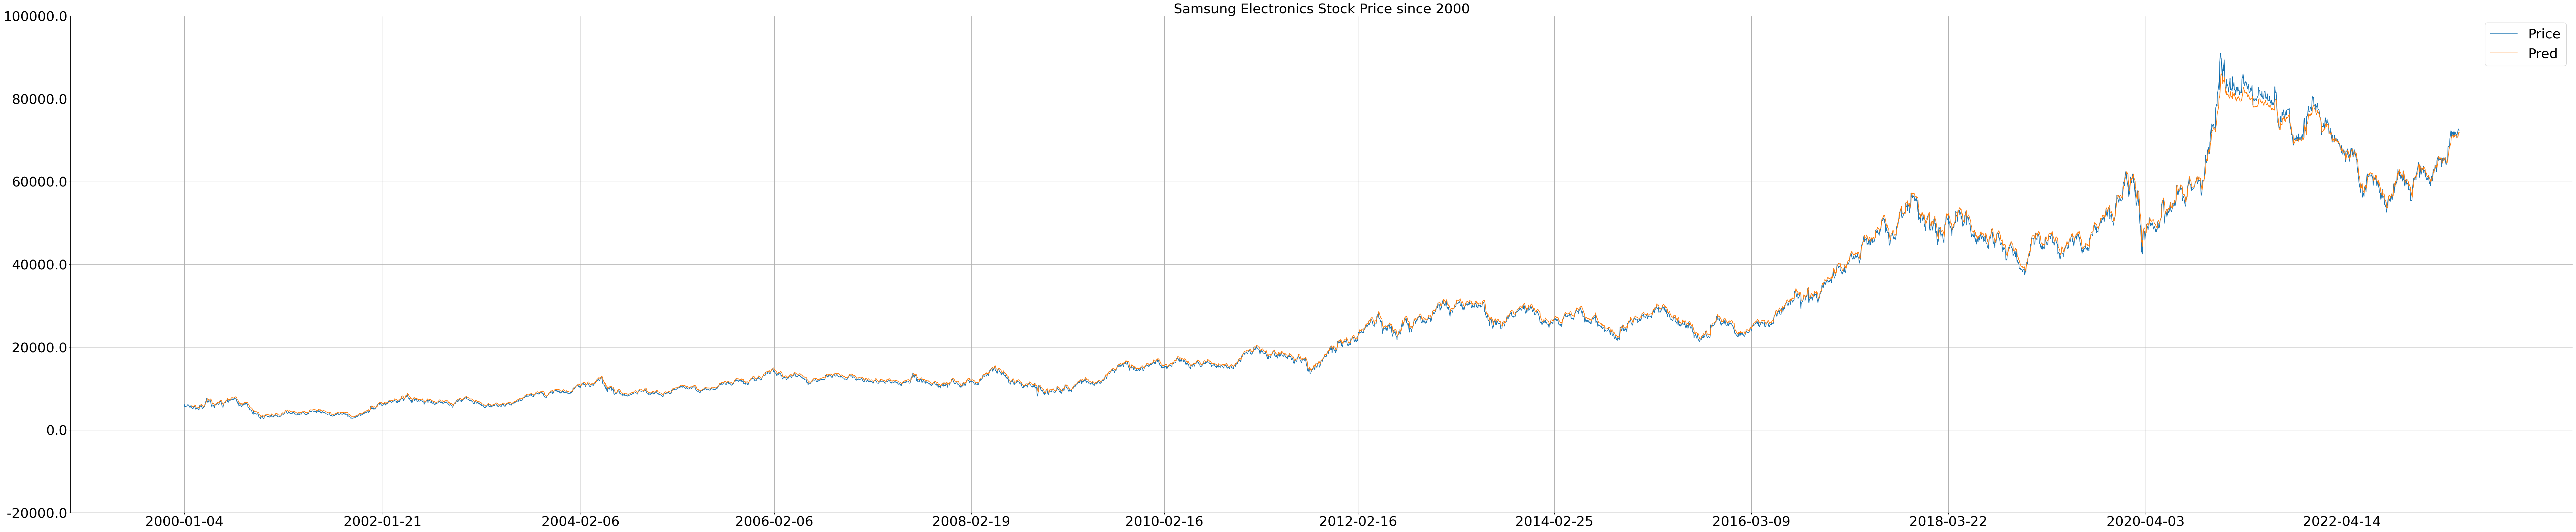

In [42]:
data_idx = raw_stock.index

# 주가 데이터 시각화
fig, ax = plt.subplots(figsize = (100, 20))

ax.plot(data_idx, raw_stock['Close'], label = 'Price')
ax.plot(data_idx[20:], stock_pred, label = "Pred")

# ax.set_ylim([0, 10])

xticks = ax.get_xticks()
xticks = [str(t)[:-9] for t in raw_stock.index[::500]]
yticks = ax.get_yticks()

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, fontsize = 30)
ax.set_yticklabels(yticks, fontsize = 30)

ax.set_title("Samsung Electronics Stock Price since 2000",
             fontsize = 30)

ax.grid()
ax.legend(fontsize = 30)

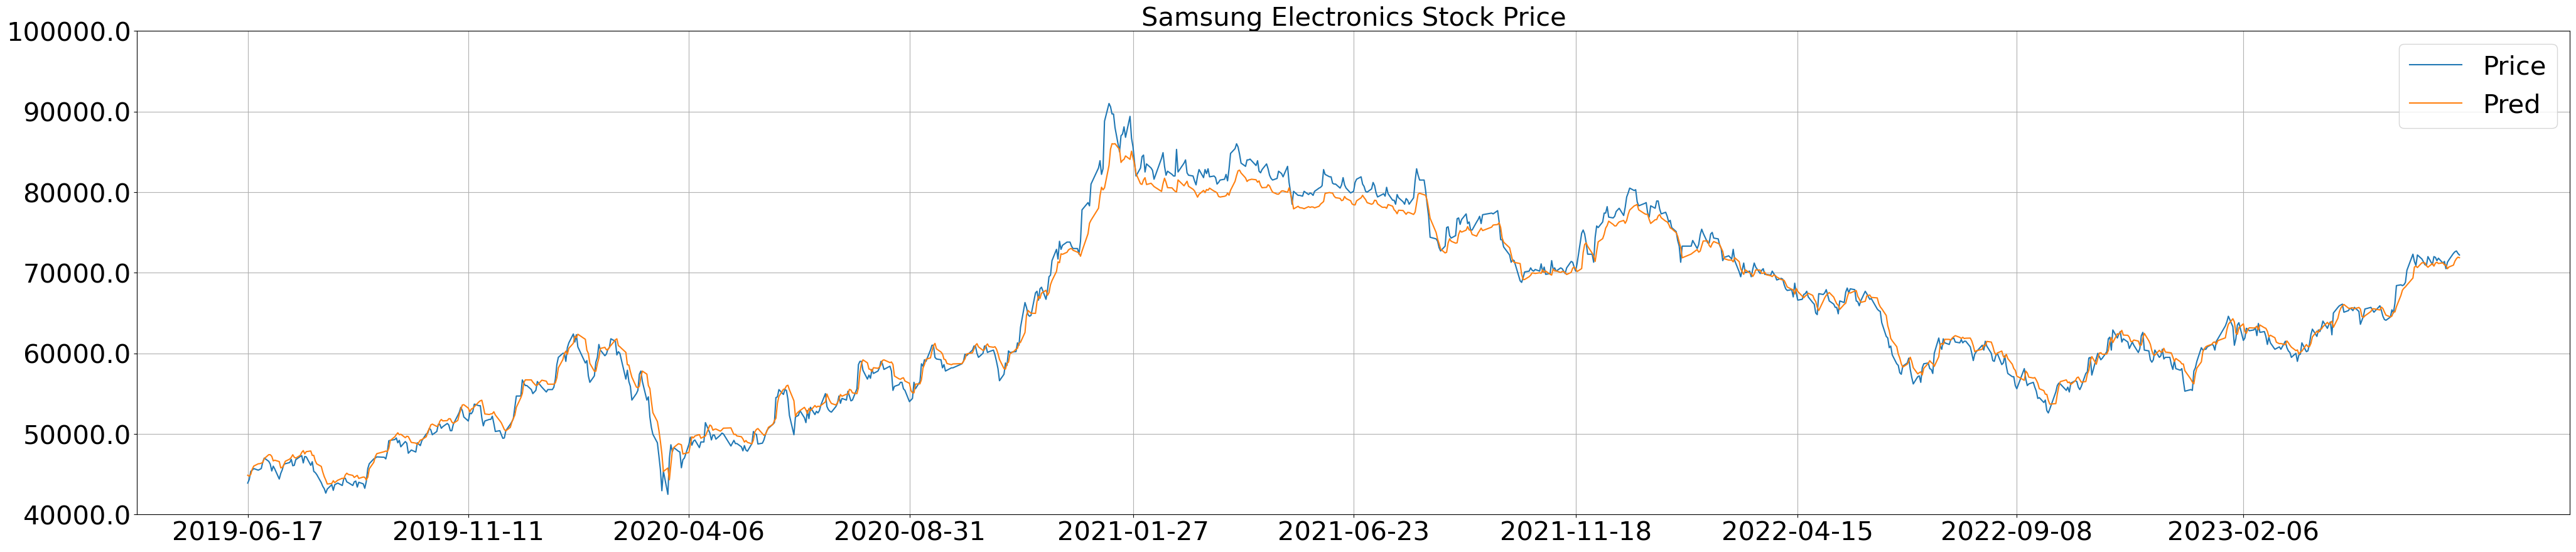

In [43]:
data_idx = raw_stock.index

# 주가 데이터 시각화
fig, ax = plt.subplots(figsize = (50, 10))

ax.plot(data_idx[-1000:], raw_stock['Close'][-1000:], label = 'Price')
ax.plot(data_idx[-1000:], stock_pred[-1000:], label = "Pred")

# ax.set_ylim([0, 10])

xticks = ax.get_xticks()
xticks = [str(t)[:-9] for t in raw_stock.index[-1000::100]]
yticks = ax.get_yticks()

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, fontsize = 30)
ax.set_yticklabels(yticks, fontsize = 30)

ax.set_title("Samsung Electronics Stock Price",
             fontsize = 30)

ax.grid()
ax.legend(fontsize = 30)

# Class Activation Map

In [44]:
import PIL
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import softmax, interpolate
from torchvision.io.image import read_image
from torchvision.transforms import transforms
from torchvision.models import resnet50
from torchvision.transforms.functional import normalize, resize, to_pil_image

from torchcam.methods import SmoothGradCAMpp, LayerCAM
from torchcam.utils import overlay_mask

c:\Users\ljh64\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 지정된 프로시저를 찾을 수 없습니다'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [45]:
model = resnet50(pretrained=True).eval()

cam_extractor = SmoothGradCAMpp(model)
# Get your input
img_path = './data/cam_sample.jpg'
# img = read_image(img_path)
img = PIL.Image.open(img_path)
tf = transforms.ToTensor()
img = tf(img)
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# Preprocess your data and feed it to the model
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
cams = cam_extractor(out.squeeze(0).argmax().item(), out) 

c:\Users\ljh64\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ljh64\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\ljh64\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (

In [46]:
# Notice that there is one CAM per target layer (here only 1)
for cam in cams:
  print(cam.shape)

torch.Size([1, 7, 7])


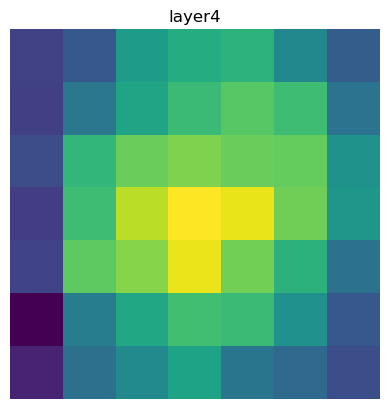

In [47]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# The raw CAM
for name, cam in zip(cam_extractor.target_names, cams):
  plt.imshow(cam.squeeze(0).numpy()); plt.axis('off'); plt.title(name); plt.show()

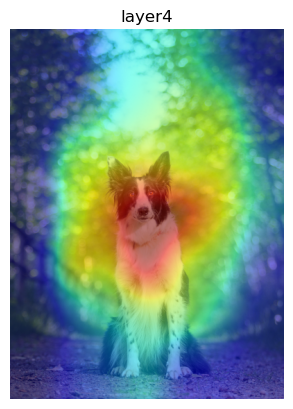

In [48]:
# Overlayed on the image
for name, cam in zip(cam_extractor.target_names, cams):
  result = overlay_mask(to_pil_image(img), to_pil_image(cam.squeeze(0), mode='F'), alpha=0.5)
  plt.imshow(result); plt.axis('off'); plt.title(name); plt.show()